# SMS Phisihing Detection Using Advanced NLP Models

In [8]:
# Edit all the Mardown cells below with the appropriate information
# Run all cells, containing your code
# Save this Jupyter with the outputs of your executed cells
#
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Abahana Zelalem
* Benjamin Arnosti
* Brandon Botezr

**Course:** AI 574 – Natural Language Processing (Fall, 2024)

## Problem Statement
The objective of this project is to develop an effective SMS phishing detection system by leveraging cutting-edge NLP models such as BERT and OpenAI LLMs. These models have revolutionized language understanding and exhibit the capability to detect phishing attempts in a more context-aware manner. By comparing their performance to traditional machine learning models such as RNNs, this project aims to highlight the strengths and limitations of each approach.

Our system will analyze both the textual content of SMS messages and any embedded features, such as URLs, email addresses, or phone numbers, to classify messages as phishing, smishing, spam, or legitimate (ham). While traditional models rely on handcrafted features and are generally faster, they may lack the sophistication needed to handle the complexities of modern phishing techniques. Transformer-based models, on the other hand, offer enhanced performance by capturing nuanced patterns in short messages, which is crucial in detecting sophisticated phishing attacks hidden in mobile text formats.

By comparing traditional and advanced models, the project will provide insights into which models strike the best balance between performance, interpretability, and computational efficiency for real-time phishing detection in mobile environments.

* **Keywords:** SMS, Phisishing, Smishing, text, phone, Natural Language Processing


## Data Collection
* Source (url): https://data.mendeley.com/datasets/f45bkkt8pr/1/
* Short Description : The dataset is a set of labelled text messages that have been collected for SMS Phishing research. It has 5971 text messages labeled as Legitimate (Ham) or Spam or Smishing. It includes 489 spam messages, 638 smishing messages, and 4844 ham messages. (Mishra, S., Soni, D., 2022)

* Keywords: SMS, Phisishing, Smishing, text, phone

## Required packages

- pandas
- numpy
- sklearn
- Torch/PyTorch
- transformers by HuggingFace
- datasets by HuggingFace
- matplotlib.pyplot
- imblearn

* These libraries can be installed via a Conda installer to create a virtual environmnet.  For specific information on installing PyTorch, see: https://pytorch.org/get-started/locally/.  For information on HuggingFace transformers or datasets, see: https://huggingface.co/learn/nlp-course/chapter0/1?fw=pt.

Users can also use the environment.yml file to create the `smishing` conda environment.

## Library Imports

In [9]:
## Your code begins here
import os

# Basic imports
import pandas as pd
import arrow
import numpy as np
import sklearn.utils

# PyTorch Imports
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# May use transformers
import transformers
# Get BERT from HF as well as Trainer class
from transformers import AutoTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset, load_dataset

# Sklearn Metric items and splitting
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Plotting
import matplotlib.pyplot as plt

## GPU Setup

In [10]:
# Trigger the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'You are usisng {device} on a {torch.cuda.get_device_name()}.')

You are usisng cuda on a NVIDIA GeForce GTX 1070.


## Model and Tokenizer Loading

Models and tokenizers will be loaded here so they can be used later on.

In [11]:
# RNN Model?
# Should these go here or should they have their own notebook?

In [12]:
# API Calls?

In [13]:
# BERT Model Loads
# Load the BERT-base-cased model
BERT_model_name = 'google-bert/bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(BERT_model_name) # Keep on CPU
model = BertForSequenceClassification.from_pretrained(BERT_model_name, num_labels=3).to(device) # Move to GPU

c:\Users\btb51\miniconda3\envs\ai574_NLP\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
tokenizer

BertTokenizerFast(name_or_path='google-bert/bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [15]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

## Data Preprocessing

We are using the (Mishra & Soni, 2022) dataset for the project.  This dataset contains a collection of labeled SMS messages with labels indicating whether they are smishing or legitimate.  While the dataset is largely clean, we have had to do some pre-processing to match ‘Spam’ and ‘spam’ as well as ‘Ham’ and ‘ham’ labels.  Each entry includes the label (ham, spam, smishing), the SMS message, and if any URL, email address, or phone number is present.  Table 1 shows a sample of the dataset.  The dataset itself contains 5971 text messages of which 4844 are ham, 489 are spam, and 638 are smishing.


In [16]:
# Load the dataset from local directory
ds = pd.read_csv("../data/processed/Dataset_5971.csv")
ds

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No
...,...,...,...,...,...
5966,ham,:( but your not here....,No,No,No
5967,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,No,No,No
5968,ham,Its a valentine game. . . send dis msg to all ...,No,No,No
5969,ham,We r outside already.,No,No,No


I believe I need to rename `label` to `labels`... I'll do this later because I need to do some clever work in getting labels to be integers for the classification.

In [17]:
cols = {'LABEL':'labels'}
ds.rename(columns=cols, inplace=True)
ds

,labels,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No
...,...,...,...,...,...
5966,ham,:( but your not here....,No,No,No
5967,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,No,No,No
5968,ham,Its a valentine game. . . send dis msg to all ...,No,No,No
5969,ham,We r outside already.,No,No,No


The labels Spam and spam are the same as well as Smishing and smishing.  I'll push them all to lowercase.

In [18]:
ds['labels'] = ds['labels'].str.lower()
ds.labels.unique()

array(['ham', 'smishing', 'spam'], dtype=object)

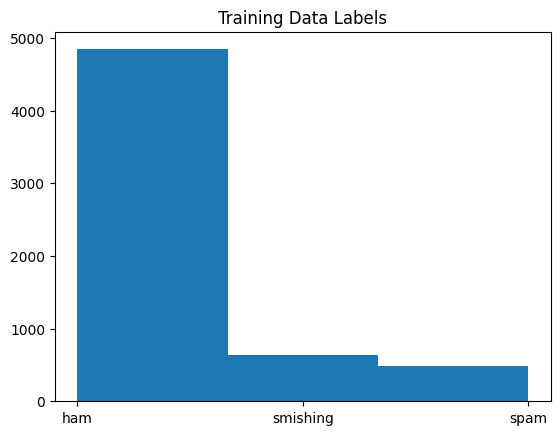

In [19]:
# A distribution of the sentence labels
# This corresponds to the eventual binning of the 5 categories
plt.hist(ds['labels'], bins=3)
plt.title('Training Data Labels');

It can be seen by the histogram above the the data is heavily weighted to the ham values.  We may need to balance this dataset.

I'm also curious just to see what the largest length of our data is.  BERT will only take a 512.

In [20]:
max_len = 0
for item in ds['TEXT']:
    if len(item) > max_len:
        max_len = len(item)

print(f'The max text length is: {max_len}')

The max text length is: 910


This is longer than BERT's max input of 512.  I wonder what the average length is for the dataset.

In [21]:
storage = 0
for item in ds['TEXT']:
    storage += len(item)

print(f'The average text length is: {storage/len(ds):.2f}')

The average text length is: 83.24


That's a lot better for BERT.  What's the distribution of lengths?

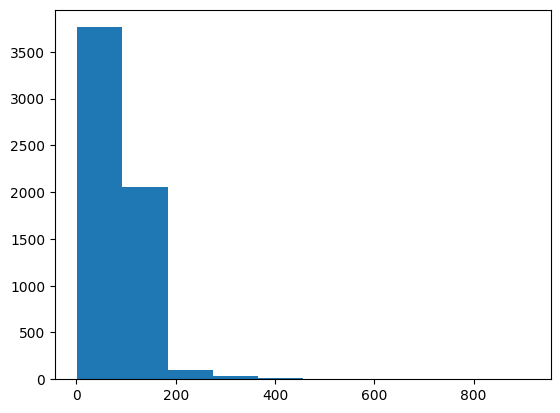

In [22]:
length_list = []
for item in ds['TEXT']:
    length_list.append(len(item))

plt.hist(length_list);

The lengths are primarily smaller lengths.  There will be a lot of Padding then.

In [23]:
# Set values to categories.
ds[['labels', 'URL', 'EMAIL', 'PHONE']] = ds[['labels', 'URL', 'EMAIL', 'PHONE']].astype('category')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   labels  5971 non-null   category
 1   TEXT    5971 non-null   object  
 2   URL     5971 non-null   category
 3   EMAIL   5971 non-null   category
 4   PHONE   5971 non-null   category
dtypes: category(4), object(1)
memory usage: 70.6+ KB


In [24]:
# Set category values to numeric values via codes
ds['labels'] = ds['labels'].cat.codes
ds['URL'] = ds['URL'].cat.codes
ds['EMAIL'] = ds['EMAIL'].cat.codes
ds['PHONE'] = ds['PHONE'].cat.codes
ds

,labels,TEXT,URL,EMAIL,PHONE
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,0,0
1,0,What's up? Do you want me to come online? If y...,0,0,0
2,0,So u workin overtime nigpun?,0,0,0
3,0,"Also sir, i sent you an email about how to log...",0,0,0
4,1,Please Stay At Home. To encourage the notion o...,0,0,0
...,...,...,...,...,...
5966,0,:( but your not here....,0,0,0
5967,0,Becoz its &lt;#&gt; jan whn al the post ofic...,0,0,0
5968,0,Its a valentine game. . . send dis msg to all ...,0,0,0
5969,0,We r outside already.,0,0,0


In [25]:
# Split the dataset into training, validation, and test sets.
train_ds, temp_ds = train_test_split(ds[['labels','TEXT', 'URL', 'EMAIL', 'PHONE']], test_size=0.2, random_state=226)
val_ds, test_ds = train_test_split(temp_ds, test_size=0.3, random_state=226)


train_ds = train_ds.reset_index(drop=True)
val_ds = val_ds.reset_index(drop=True)
test_ds = test_ds.reset_index(drop=True)

print(f'Lengths of training: {len(train_ds)}')
print(f'Lengths of validation: {len(val_ds)}')
print(f'Lengths of test: {len(test_ds)}')

Lengths of training: 4776
Lengths of validation: 836
Lengths of test: 359


In [26]:
# Take another look at the dataset.
train_ds

,labels,TEXT,URL,EMAIL,PHONE
0,0,Sorry i missed your call. Can you please call ...,0,0,0
1,0,"Pete,is this your phone still? Its Jenny from ...",0,0,0
2,0,Let's pool our money together and buy a bunch ...,0,0,0
3,0,"Whenevr ur sad, Whenevr ur gray, Remembr im he...",0,0,0
4,2,Want 2 get laid tonight? Want real Dogging loc...,0,0,1
...,...,...,...,...,...
4771,1,\tRefused a loan? Secured or Unsecured? Can't ...,0,0,1
4772,0,U WILL SWITCH YOUR FONE ON DAMMIT!!,0,0,0
4773,0,The guy did some bitching but I acted like i'd...,0,0,0
4774,0,"idc get over here, you are not weaseling your ...",0,0,0


How do the distributions between the train and test set look?

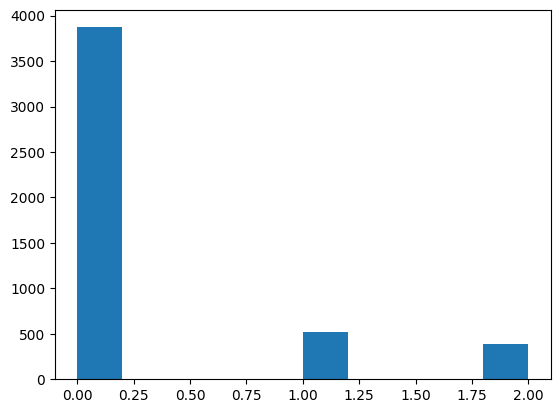

In [27]:
# Training distribution between ham, spam, smish
plt.hist(train_ds['labels']);

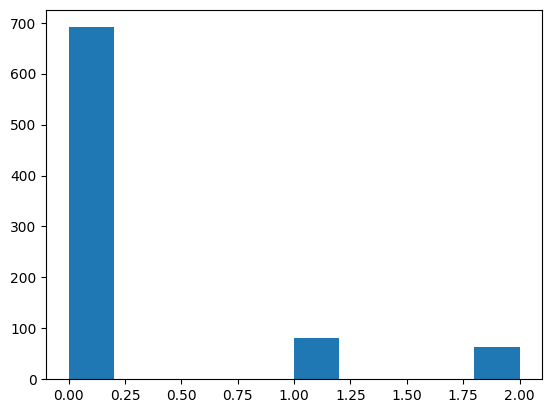

In [28]:
# Val distribution between ham, spam, smish
plt.hist(val_ds['labels']);

(array([281.,   0.,   0.,   0.,   0.,  41.,   0.,   0.,   0.,  37.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

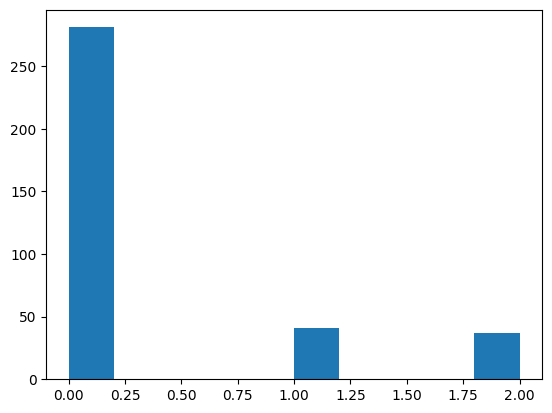

In [29]:
# Test distribution between ham, spam, smish
plt.hist(test_ds['labels'])

The distributions are similar.

In [30]:
from datasets import DatasetDict, Dataset # bring this in again to make sure I have the right one.

# Move the train, val, and test into datasets to then be moved to a DatasetDict
train_dataset = Dataset.from_pandas(train_ds)
val_datset = Dataset.from_pandas(val_ds)
test_dataset = Dataset.from_pandas(test_ds)

train_dataset

Dataset({
    features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE'],
    num_rows: 4776
})

In [31]:
# Move data to the DatasetDict
data = DatasetDict({
    'train': train_dataset,
    'val': val_datset,
    'test': test_dataset
})
data

DatasetDict({
    train: Dataset({
        features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE'],
        num_rows: 4776
    })
    val: Dataset({
        features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE'],
        num_rows: 836
    })
    test: Dataset({
        features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE'],
        num_rows: 359
    })
})

This matches the above histogram.

We now have all the sentence data mapped to five categorical labels.  We are now in a good place to begin tokenizing and fine-tuning the model.

### Tokenizing the Data

We can now tokenize all of the sentences by fine-tuning the BERT tokenizer.
Let's just run a quick tokenizer test to ensure we know how it works.

In [32]:
# A quick test to ensure the tokenizer is working as expected.
test = tokenizer('Hello there.')
print(f"Input_ids: {test['input_ids']}\nConversion back: {tokenizer.convert_ids_to_tokens(test['input_ids'])}")


Input_ids: [101, 8667, 1175, 119, 102]
Conversion back: ['[CLS]', 'Hello', 'there', '.', '[SEP]']


In [33]:
print(f'Length of the tokenizer: {len(tokenizer)}\nCurrent word_embedding: {model.bert.embeddings.word_embeddings}')

Length of the tokenizer: 28996
Current word_embedding: Embedding(28996, 768, padding_idx=0)


Now let's tokenize everything with a function to use with map.

In [34]:
# Create a tokenizing function to apply via a map
def tokenize_the_data(dskey):
    # Set the max length to 512 as that is the BERT max.
    tokenized_data = tokenizer(dskey['TEXT'], padding='max_length', max_length=512, truncation=True,
                               return_tensors='pt', return_attention_mask=True )
    return tokenized_data

In [35]:
# Tokenize the data
tokenized_dataset = DatasetDict({
    'train': train_dataset.map(tokenize_the_data),
    'val': val_datset.map(tokenize_the_data),
    'test': test_dataset.map(tokenize_the_data)
})

Map:   0%|          | 0/4776 [00:00<?, ? examples/s]

Map:   0%|          | 0/836 [00:00<?, ? examples/s]

Map:   0%|          | 0/359 [00:00<?, ? examples/s]

In [36]:
# Check the tokenized_dataset for its layout
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4776
    })
    val: Dataset({
        features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 836
    })
    test: Dataset({
        features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 359
    })
})

In [37]:
# Check some tokenized dataset values to ensure it worked as intended.
text_holder = np.array(tokenized_dataset['train']['input_ids'][0]).flatten()
# text_holder = text_holder[0]
print(f"Input_ids: {tokenized_dataset['train']['input_ids'][0]}\nConversion back: {tokenizer.convert_ids_to_tokens(text_holder)}")

Input_ids: [[101, 6502, 178, 4007, 1240, 1840, 119, 2825, 1128, 4268, 1840, 1171, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Data Cleanup and Formatting for Torch

The tokenized dataset still has extra columns that are no longer needed.  While they should be automatically removed for the forward pass in the Trainer, I'll remove them manually here and save the Trainer the effort.

I'll also end up running into an issue if I don't `squeeze()` my data as the trainer is looking for shapes of (batch, seq_len).  Right now there is an extra dimension that needs to be taken out which I'll do here as well.

In [38]:
# Look at the dataset
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4776
    })
    val: Dataset({
        features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 836
    })
    test: Dataset({
        features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 359
    })
})

In [39]:
# Remove the unused features and reduce the dataset
tokenized_dataset_reduced = tokenized_dataset.remove_columns(['TEXT', 'URL', 'EMAIL', 'PHONE', 'token_type_ids'])
tokenized_dataset_reduced

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 4776
    })
    val: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 836
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 359
    })
})

In [40]:
# Does everything exist that should exist.
# I did drop token_type_ids which may be able to be passed along later... I'll have to get this working first.
assert 'input_ids' in tokenized_dataset_reduced['train'].column_names
assert 'attention_mask' in tokenized_dataset_reduced['train'].column_names
assert 'labels' in tokenized_dataset_reduced['train'].column_names

In [41]:
tokenized_dataset_reduced.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

There is still a shaping issue that must be resolved for training.  this is because the tokenized_dataset_reduced['train']['input_ids'] is a list, rather than a Tensor.  I'll convert things here.

In [43]:
# Showing the poor shaping
print(f"Poor shape of input_ids:      {tokenized_dataset_reduced['train'][0]['input_ids'].shape}")
print(f"Poor shape of attention_mask: {tokenized_dataset_reduced['train'][0]['attention_mask'].shape}")
print(f"Poor shape of labels:         {tokenized_dataset_reduced['train'][0]['labels'].shape}")

Poor shape of input_ids:      torch.Size([1, 512])
Poor shape of attention_mask: torch.Size([1, 512])
Poor shape of labels:         torch.Size([])


In [44]:
# Funciton to squeeze my dimensions
def squeeze_dims(dskey):
    if 'input_ids' in dskey:
        dskey['input_ids'] = torch.squeeze(dskey['input_ids'])
    if 'attention_mask' in dskey:
        dskey['attention_mask'] = torch.squeeze(dskey['attention_mask'])
    if 'labels' in dskey:
        dskey['labels'] = torch.squeeze(dskey['labels'])

    return dskey

In [45]:
# Squeeze the dimensions.
tokenized_dataset_reduced = tokenized_dataset_reduced.map(squeeze_dims)

Map:   0%|          | 0/4776 [00:00<?, ? examples/s]

Map:   0%|          | 0/836 [00:00<?, ? examples/s]

Map:   0%|          | 0/359 [00:00<?, ? examples/s]

In [46]:
# Showing the good shaping
print(f"Good shape of input_ids:      {tokenized_dataset_reduced['train'][0]['input_ids'].shape}")
print(f"Good shape of attention_mask: {tokenized_dataset_reduced['train'][0]['attention_mask'].shape}")
print(f"Good shape of labels:         {tokenized_dataset_reduced['train'][0]['labels'].shape}")

Good shape of input_ids:      torch.Size([512])
Good shape of attention_mask: torch.Size([512])
Good shape of labels:         torch.Size([])


In [47]:
# Check the first few labels and their types to double check they are integers for the categorization

print(tokenized_dataset_reduced['train']['labels'][:10])  # First 10 labels
print(type(tokenized_dataset_reduced['train']['labels'][0]))  # Type of the first label

tensor([0, 0, 0, 0, 2, 0, 0, 0, 0, 0])
<class 'torch.Tensor'>


We now have a working dataset to use with the models.

### Setting up an Undersampled Dataset

There is the change that given the heavy distribution of the data to ham values that there could be issues in the training of the models.  Here we'll set up a second dataset which is undersampled from the full dataset.

In [48]:
# Undersampling setups

from imblearn import under_sampling
from datasets import Dataset # Make sure I have the right Dataset
# Resample here

# Resample via undersampling up here

# I'll cut everything down to the m items which is just below the lowest class and still easily batchable
rus = under_sampling.RandomUnderSampler(random_state=226, replacement=False)

# Create a copy of the dataset and convert it to DataFrame
data_under = data.copy()
train_df = pd.DataFrame(data_under['train'])

# Ensure labels are in integer format
train_df['labels'] = train_df['labels'].astype(int)

# Separate features and labels
X = train_df.drop(columns=['labels'])
y = train_df['labels']

# Apply RandomUnderSampler
X_under, y_under = rus.fit_resample(X, y)

# Combine the resampled features and labels back into a DataFrame
train_resampled = X_under.copy()
train_resampled['labels'] = y_under

# Assign the resampled data back to the dataset
data_usample = data.copy()
data_usample['train'] = Dataset.from_pandas(train_resampled, preserve_index=False)

In [49]:
# Check the new DatasetDict
data_usample

{'train': Dataset({
     features: ['TEXT', 'URL', 'EMAIL', 'PHONE', 'labels'],
     num_rows: 1167
 }),
 'val': Dataset({
     features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE'],
     num_rows: 836
 }),
 'test': Dataset({
     features: ['labels', 'TEXT', 'URL', 'EMAIL', 'PHONE'],
     num_rows: 359
 })}

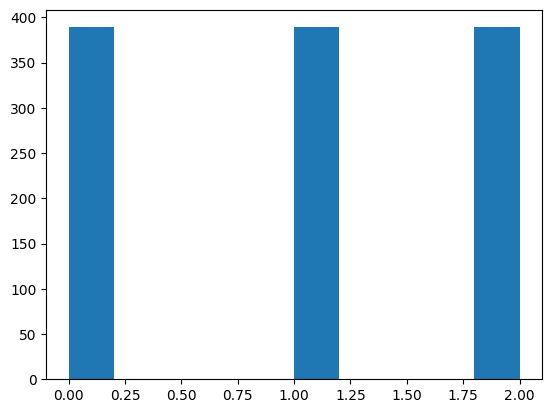

In [50]:
# Make sure the undersampling is even
plt.hist(data_usample['train']['labels']);

Now we must go through all the data cleanup and formatting again.

In [53]:
# Rebuild the data for training with the undersampled set

# Tokenize the undersampled
tokenized_usample_dataset = DatasetDict({
    'train': data_usample['train'].map(tokenize_the_data),
    'validation': data_usample['val'].map(tokenize_the_data),
    'test': data_usample['test'].map(tokenize_the_data)
})

# Remove extra columns
tokenized_usample_dataset_reduced = tokenized_dataset.remove_columns(['TEXT', 'URL', 'EMAIL', 'PHONE', 'token_type_ids'])
tokenized_usample_dataset_reduced['train'] = tokenized_usample_dataset_reduced['train'].remove_columns([])
tokenized_usample_dataset_reduced

# Does everything exist that should exist.
# I did drop token_type_ids which may be able to be passed along later... I'll have to get this working first.
assert 'input_ids' in tokenized_usample_dataset_reduced['train'].column_names
assert 'attention_mask' in tokenized_usample_dataset_reduced['train'].column_names
assert 'labels' in tokenized_usample_dataset_reduced['train'].column_names

# Set the Tensor format
tokenized_usample_dataset_reduced.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Showing the poor shaping
print(f"Poor shape of input_ids:      {tokenized_usample_dataset_reduced['train'][0]['input_ids'].shape}")
print(f"Poor shape of attention_mask: {tokenized_usample_dataset_reduced['train'][0]['attention_mask'].shape}")
print(f"Poor shape of labels:         {tokenized_usample_dataset_reduced['train'][0]['labels'].shape}")

tokenized_usample_dataset_reduced = tokenized_usample_dataset_reduced.map(squeeze_dims)

print(f"Good shape of input_ids:      {tokenized_usample_dataset_reduced['train'][0]['input_ids'].shape}")
print(f"Good shape of attention_mask: {tokenized_usample_dataset_reduced['train'][0]['attention_mask'].shape}")
print(f"Good shape of labels:         {tokenized_usample_dataset_reduced['train'][0]['labels'].shape}\n")

# Check the labels
# Check the first few labels and their types to double check they are integers for the categorization
print(tokenized_usample_dataset_reduced['train']['labels'][:10])  # First 10 labels
print(type(tokenized_usample_dataset_reduced['train']['labels'][0]))  # Type of the first label

Map:   0%|          | 0/1167 [00:00<?, ? examples/s]

Map:   0%|          | 0/836 [00:00<?, ? examples/s]

Map:   0%|          | 0/359 [00:00<?, ? examples/s]

Poor shape of input_ids:      torch.Size([1, 512])
Poor shape of attention_mask: torch.Size([1, 512])
Poor shape of labels:         torch.Size([])


Map:   0%|          | 0/4776 [00:00<?, ? examples/s]

Map:   0%|          | 0/836 [00:00<?, ? examples/s]

Map:   0%|          | 0/359 [00:00<?, ? examples/s]

Good shape of input_ids:      torch.Size([512])
Good shape of attention_mask: torch.Size([512])
Good shape of labels:         torch.Size([])

tensor([0, 0, 0, 0, 2, 0, 0, 0, 0, 0])
<class 'torch.Tensor'>


Now we have an undersampled dataset to use as well.

## Methodology

1. Explan your Deep Learning process / methodology

Our approach to classify ham, spam, and smishing messages using neural networks involves the following stages:
1.	Text Preprocessing: The messages will undergo tokenization, stopword removal, and lemmatization. Additionally, URL features will be extracted and processed separately.

2.	Using Traditional Models:
o	We will use TensorFlow to build out traditional models such Logistic Regression and SVM, LSTM.  These baseline models will be used to classify messages based on TF-IDF features.

3.	Advanced Models:
- BERT: We will leverage a fine-tuned BERT model for SMS classification, leveraging its ability to capture contextual relationships even in short texts.  This BERT model uses a specific tokenizer on the full, unedited dataset.
- `RoBERTa: As a more robust version of BERT, RoBERTa will be used for text classification, aiming to improve the precision of phishing detection.` - **REMOVE THIS??**
- LLMs accessed via API: We will experiment with an LLM accessed via API for message generation to simulate phishing SMS scenarios and evaluate how well it detects sophisticated phishing attacks.  Some models we plan on accessing are Google’s Gemini and OpenAI’s Chat GPT-4.
`4.	Ensemble Method: We will explore ensemble learning to combine the predictions from different models, including both textual and URL-based classifiers.` - **REMOVE THIS??**


2. Introduce the Deep Neural Networks you used in your project
 * RNN - [type?]
    * Description 
 
 * BERT
    * BERT is a transformer model that learns bidirectional representations by predicting masked words and sentence relationships, enabling strong performance across various NLP tasks.
 
 * LLM
     * Description 
 
 
**Keywords:** natural language processing, recurrent neural netowrks, transformers, sentiment analysis, multi-label classification, prediction, large language models

___

**Example**
* ConvNet
    * A convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery(source Wikipedia). 
 
* **Keywords:** supervised learning, classification, ...

### Model Fitting and Validation

1. model 1 
    - decription 
2. model 2
    - decription 

### RNN

In [54]:
## Your code begins here

#### Model Evaluation

* Examine your models (coefficients, parameters, errors, etc...)

* Compute and interpret your results in terms of accuracy, precision, recall, ROC etc.

In [55]:
## Your code begins here


### BERT - Full Dataset

Now that we have tokenized data, let us fine-tune the BERT model.

This is done with the Trainer class which takes TrainingArguments.

In [56]:
# Set up the Training Args
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10, # Prior runs show that I may be over fitting the data at 25 epochs...
    weight_decay=0.01,
    logging_dir='./logs',
    # logging_steps=10, # This made my loss vs epoch plot too noisy...
    logging_strategy='epoch',
    save_strategy='epoch',
)

# Set up the Trainer

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding=True, return_tensors='pt')

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset_reduced['train'],
    eval_dataset=tokenized_dataset_reduced['val'],
    tokenizer=tokenizer,
    data_collator=data_collator
)

In [57]:
# Run the Trainer
trainer.train()

  0%|          | 0/2990 [00:00<?, ?it/s]

c:\Users\btb51\miniconda3\envs\ai574_NLP\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


{'loss': 0.2259, 'grad_norm': 4.01845645904541, 'learning_rate': 4.5e-05, 'epoch': 1.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.15716399252414703, 'eval_runtime': 20.5431, 'eval_samples_per_second': 40.695, 'eval_steps_per_second': 2.58, 'epoch': 1.0}
{'loss': 0.147, 'grad_norm': 17.951208114624023, 'learning_rate': 4e-05, 'epoch': 2.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.1712954193353653, 'eval_runtime': 20.6806, 'eval_samples_per_second': 40.424, 'eval_steps_per_second': 2.563, 'epoch': 2.0}
{'loss': 0.1239, 'grad_norm': 0.6130803227424622, 'learning_rate': 3.5e-05, 'epoch': 3.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.1260131597518921, 'eval_runtime': 20.6915, 'eval_samples_per_second': 40.403, 'eval_steps_per_second': 2.561, 'epoch': 3.0}
{'loss': 0.0788, 'grad_norm': 0.23077715933322906, 'learning_rate': 3e-05, 'epoch': 4.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.17188113927841187, 'eval_runtime': 20.5337, 'eval_samples_per_second': 40.713, 'eval_steps_per_second': 2.581, 'epoch': 4.0}
{'loss': 0.0674, 'grad_norm': 0.48819881677627563, 'learning_rate': 2.5e-05, 'epoch': 5.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.1346081793308258, 'eval_runtime': 20.5594, 'eval_samples_per_second': 40.663, 'eval_steps_per_second': 2.578, 'epoch': 5.0}
{'loss': 0.0487, 'grad_norm': 0.41816139221191406, 'learning_rate': 2e-05, 'epoch': 6.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.1372605711221695, 'eval_runtime': 20.5577, 'eval_samples_per_second': 40.666, 'eval_steps_per_second': 2.578, 'epoch': 6.0}
{'loss': 0.0394, 'grad_norm': 0.14707240462303162, 'learning_rate': 1.5e-05, 'epoch': 7.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.15815767645835876, 'eval_runtime': 20.5546, 'eval_samples_per_second': 40.672, 'eval_steps_per_second': 2.578, 'epoch': 7.0}
{'loss': 0.0298, 'grad_norm': 0.024997003376483917, 'learning_rate': 1e-05, 'epoch': 8.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.14186593890190125, 'eval_runtime': 20.546, 'eval_samples_per_second': 40.689, 'eval_steps_per_second': 2.58, 'epoch': 8.0}
{'loss': 0.0222, 'grad_norm': 0.0011293706484138966, 'learning_rate': 5e-06, 'epoch': 9.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.14636199176311493, 'eval_runtime': 20.5359, 'eval_samples_per_second': 40.709, 'eval_steps_per_second': 2.581, 'epoch': 9.0}
{'loss': 0.0181, 'grad_norm': 0.04069998860359192, 'learning_rate': 0.0, 'epoch': 10.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.150501549243927, 'eval_runtime': 20.6795, 'eval_samples_per_second': 40.426, 'eval_steps_per_second': 2.563, 'epoch': 10.0}
{'train_runtime': 4783.0558, 'train_samples_per_second': 9.985, 'train_steps_per_second': 0.625, 'train_loss': 0.08011456444909341, 'epoch': 10.0}


TrainOutput(global_step=2990, training_loss=0.08011456444909341, metrics={'train_runtime': 4783.0558, 'train_samples_per_second': 9.985, 'train_steps_per_second': 0.625, 'total_flos': 1.256629683068928e+16, 'train_loss': 0.08011456444909341, 'epoch': 10.0})

#### Model Evaluation

* Examine your models (coefficients, parameters, errors, etc...)

* Compute and interpret your results in terms of accuracy, precision, recall, ROC etc. 

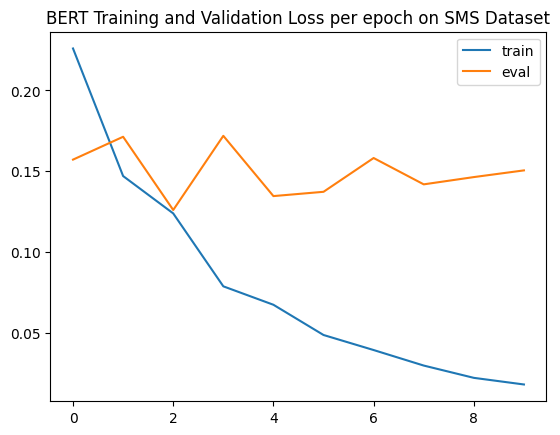

In [58]:
# Check the training and validation losses
# Grab the losses from the trainer's log history.
training_losses = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
evaluation_losses = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log and 'epoch' in log]

# Plot the losses per epoch.
plt.plot(range(0,len(training_losses)), training_losses, label='train')
plt.plot(range(0, len(training_losses)), evaluation_losses, label='eval')
plt.legend()
plt.title('BERT Training and Validation Loss per epoch on SMS Dataset');

At late epochs, we begin to see some signs of overfitting but they are not drastic yet.

In [59]:
# Generate predictions from the test set
preds = trainer.predict(tokenized_dataset_reduced['test'])

  0%|          | 0/23 [00:00<?, ?it/s]

In [60]:
# Grab the logits
preds_logits = preds.predictions
print(f'Example logit: {preds_logits[0]}')

# Which label does the logit correspond to, use proper axis
preds_labels = np.argmax(preds_logits, axis=1)
print(f'Class Label: {preds_labels[0]}')

# Get the actual labels from the test set
true_labels = preds.label_ids
print(f'True Label: {true_labels[0]}')

Example logit: [ 7.554836  -3.3327072 -3.7727323]
Class Label: 0
True Label: 0


In [78]:
# Run some metrics on the classification of the model
class_report = metrics.classification_report(true_labels, preds_labels,
                                             target_names=['ham', 'smishing', 'spam'])

print(f"Classification Report for BERT SMS Dataset:\n", class_report)

Classification Report for BERT SMS Dataset:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       281
    smishing       0.86      0.88      0.87        41
        spam       0.83      0.78      0.81        37

    accuracy                           0.96       359
   macro avg       0.89      0.89      0.89       359
weighted avg       0.96      0.96      0.96       359



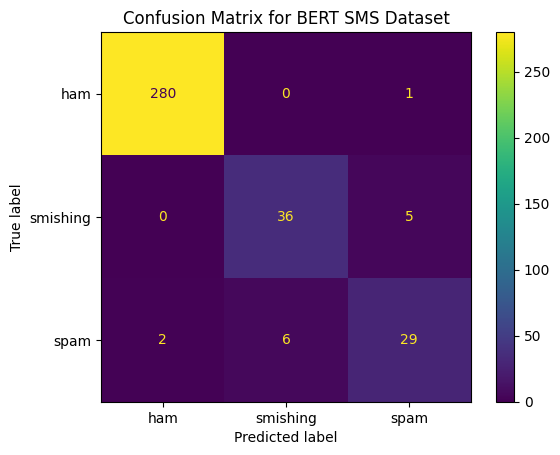

In [93]:
# Confusion matrix to see where things are going sideways
cm = metrics.confusion_matrix(true_labels, preds_labels)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['ham', 'smishing', 'spam'])
disp.plot()
plt.title("Confusion Matrix for BERT SMS Dataset")

plt.show();

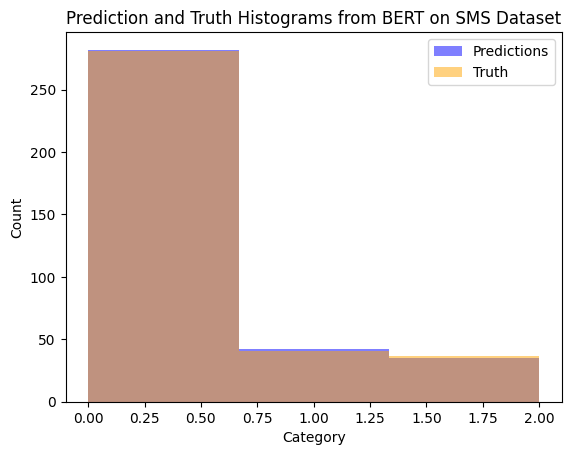

In [84]:
# Check the distribution of the predictions as well
# Overlay the histograms

plt.hist(preds_labels, bins=3, color='blue', alpha=0.5, label='Predictions')
plt.hist(true_labels, bins=3, color='orange', alpha=0.5, label='Truth')
plt.legend()
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Prediction and Truth Histograms from BERT on SMS Dataset')
plt.show();

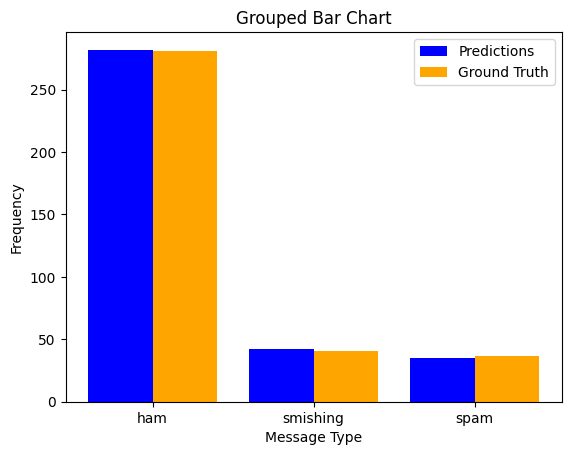

In [ ]:
# Map of numerical labels to categories
label_map = {0: 'ham', 1: 'smishing', 2: 'spam'}

# Convert numerical labels to categorical labels
pred_categories = [label_map[x] for x in preds_labels]
truth_categories = [label_map[x] for x in true_labels]

bar_width = 0.4

# Count the occurrences of each category
unique, counts = np.unique(pred_categories, return_counts=True)
category_counts = dict(zip(unique, counts))

# Categories and values
categories = list(category_counts.keys())  # ['ham', 'smishing', 'spam']
pred_values = list(category_counts.values())  # [10, 15, 5]
# X positions for the bars
x = np.arange(len(categories))
plt.bar(x - bar_width / 2, pred_values, bar_width, label='Predictions', color='blue')

# Count the occurrences of each category
unique, counts = np.unique(truth_categories, return_counts=True)
category_counts = dict(zip(unique, counts))

# Categories and values
categories = list(category_counts.keys())  # ['ham', 'smishing', 'spam']
truth_values = list(category_counts.values())  # [8, 12, 7]
# Create grouped bar chart
plt.bar(x + bar_width / 2, truth_values, bar_width, label='Ground Truth', color='orange')

# Add labels and title
plt.xlabel('Message Type')
plt.ylabel('Frequency')
plt.title('Grouped Bar Chart for SMS Dataset')
plt.xticks(x, categories)  # Replace numerical ticks with category names
plt.legend()

In [64]:
# ROC CURVE


### BERT - Undersampled Dataset

In [65]:
# Build another BERT model for training
model_usamp = BertForSequenceClassification.from_pretrained(BERT_model_name, num_labels=3).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [66]:
# Set up the Training Args
training_args_usamp = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10, # Prior runs show that I may be over fitting the data at 25 epochs...
    weight_decay=0.01,
    logging_dir='./logs',
    # logging_steps=10, # This made my loss vs epoch plot too noisy...
    logging_strategy='epoch',
    save_strategy='epoch',
)

# Setup trainer
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding=True, return_tensors='pt')

trainer_usamp = Trainer(
    model=model_usamp,
    args=training_args_usamp,
    train_dataset=tokenized_dataset_reduced['train'],
    eval_dataset=tokenized_dataset_reduced['val'],
    tokenizer=tokenizer,
    data_collator=data_collator
)

In [67]:
# Run the trainer
trainer_usamp.train()

  0%|          | 0/2990 [00:00<?, ?it/s]

{'loss': 0.1947, 'grad_norm': 1.7668185234069824, 'learning_rate': 4.5e-05, 'epoch': 1.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.19591617584228516, 'eval_runtime': 20.6568, 'eval_samples_per_second': 40.471, 'eval_steps_per_second': 2.566, 'epoch': 1.0}
{'loss': 0.1159, 'grad_norm': 9.72795581817627, 'learning_rate': 4e-05, 'epoch': 2.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.11316753178834915, 'eval_runtime': 20.6506, 'eval_samples_per_second': 40.483, 'eval_steps_per_second': 2.567, 'epoch': 2.0}
{'loss': 0.0748, 'grad_norm': 0.16786441206932068, 'learning_rate': 3.5e-05, 'epoch': 3.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.1299290508031845, 'eval_runtime': 20.6917, 'eval_samples_per_second': 40.403, 'eval_steps_per_second': 2.561, 'epoch': 3.0}
{'loss': 0.0584, 'grad_norm': 0.43671658635139465, 'learning_rate': 3e-05, 'epoch': 4.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.14818233251571655, 'eval_runtime': 21.9418, 'eval_samples_per_second': 38.101, 'eval_steps_per_second': 2.415, 'epoch': 4.0}
{'loss': 0.0518, 'grad_norm': 0.06766756623983383, 'learning_rate': 2.5e-05, 'epoch': 5.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.12518368661403656, 'eval_runtime': 21.9469, 'eval_samples_per_second': 38.092, 'eval_steps_per_second': 2.415, 'epoch': 5.0}
{'loss': 0.0426, 'grad_norm': 0.2530498206615448, 'learning_rate': 2e-05, 'epoch': 6.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.16237680613994598, 'eval_runtime': 22.3638, 'eval_samples_per_second': 37.382, 'eval_steps_per_second': 2.37, 'epoch': 6.0}
{'loss': 0.0362, 'grad_norm': 0.20518258213996887, 'learning_rate': 1.5e-05, 'epoch': 7.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.15478834509849548, 'eval_runtime': 22.4856, 'eval_samples_per_second': 37.179, 'eval_steps_per_second': 2.357, 'epoch': 7.0}
{'loss': 0.0294, 'grad_norm': 0.0678068995475769, 'learning_rate': 1e-05, 'epoch': 8.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.15985991060733795, 'eval_runtime': 21.9251, 'eval_samples_per_second': 38.13, 'eval_steps_per_second': 2.417, 'epoch': 8.0}
{'loss': 0.0231, 'grad_norm': 0.0007586234714835882, 'learning_rate': 5e-06, 'epoch': 9.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.17325858771800995, 'eval_runtime': 22.3939, 'eval_samples_per_second': 37.332, 'eval_steps_per_second': 2.367, 'epoch': 9.0}
{'loss': 0.02, 'grad_norm': 0.06663120537996292, 'learning_rate': 0.0, 'epoch': 10.0}


  0%|          | 0/53 [00:00<?, ?it/s]

{'eval_loss': 0.17431879043579102, 'eval_runtime': 21.9465, 'eval_samples_per_second': 38.093, 'eval_steps_per_second': 2.415, 'epoch': 10.0}
{'train_runtime': 12618.4717, 'train_samples_per_second': 3.785, 'train_steps_per_second': 0.237, 'train_loss': 0.06467342217231674, 'epoch': 10.0}


TrainOutput(global_step=2990, training_loss=0.06467342217231674, metrics={'train_runtime': 12618.4717, 'train_samples_per_second': 3.785, 'train_steps_per_second': 0.237, 'total_flos': 1.256629683068928e+16, 'train_loss': 0.06467342217231674, 'epoch': 10.0})

#### Model Evaluation

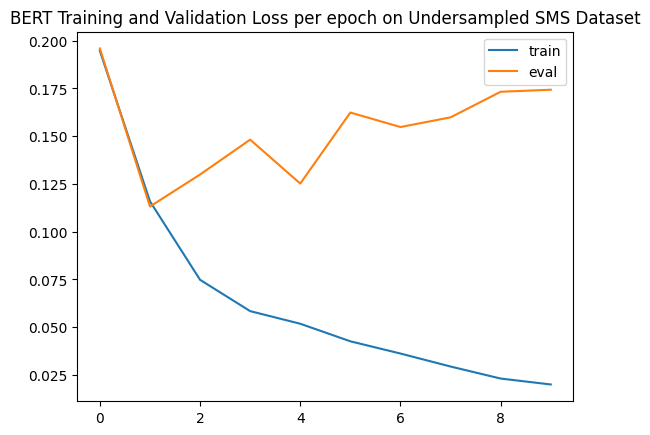

In [68]:
# Check the training and validation losses
# Grab the losses from the trainer's log history.
training_losses = [log['loss'] for log in trainer_usamp.state.log_history if 'loss' in log]
evaluation_losses = [log['eval_loss'] for log in trainer_usamp.state.log_history if 'eval_loss' in log and 'epoch' in log]

# Plot the losses per epoch.
plt.plot(range(0,len(training_losses)), training_losses, label='train')
plt.plot(range(0, len(training_losses)), evaluation_losses, label='eval')
plt.legend()
plt.title('BERT Training and Validation Loss per epoch on Undersampled SMS Dataset');

In [69]:
# Generate predictions from the full test set
preds = trainer_usamp.predict(tokenized_dataset_reduced['test'])

  0%|          | 0/23 [00:00<?, ?it/s]

In [70]:
# Grab the logits
preds_logits = preds.predictions
print(f'Example logit: {preds_logits[0]}')

# Which label does the logit correspond to, use proper axis
preds_labels = np.argmax(preds_logits, axis=1)
print(f'Class Label: {preds_labels[0]}')

# Get the actual labels from the test set
true_labels = preds.label_ids
print(f'True Label: {true_labels[0]}')

Example logit: [ 7.6148586 -3.9735537 -3.5430713]
Class Label: 0
True Label: 0


In [71]:
# Run some metrics on the classification of the model
class_report = metrics.classification_report(true_labels, preds_labels,
                                             target_names=['C0', 'C1', 'C2'])

print(f"Classification Report for BERT Undersampled SMS Dataset:\n", class_report)

Classification Report for BERT Undersampled SMS Dataset:
               precision    recall  f1-score   support

          C0       0.99      1.00      0.99       281
          C1       0.86      0.88      0.87        41
          C2       0.83      0.78      0.81        37

    accuracy                           0.96       359
   macro avg       0.89      0.89      0.89       359
weighted avg       0.96      0.96      0.96       359



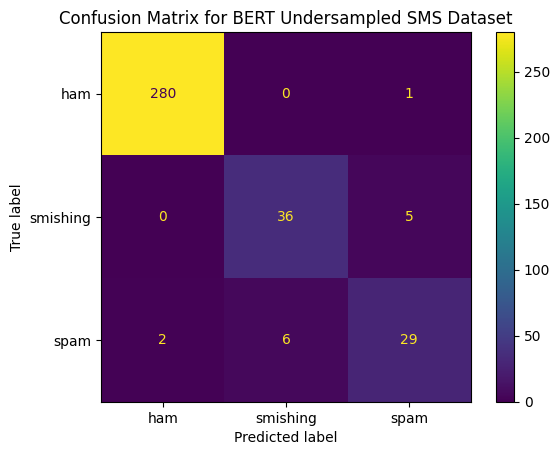

In [81]:
# Confusion matrix to see where things are going sideways
cm = metrics.confusion_matrix(true_labels, preds_labels)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['ham', 'smishing', 'spam'])
disp.plot()
plt.title("Confusion Matrix for BERT Undersampled SMS Dataset")
plt.show();

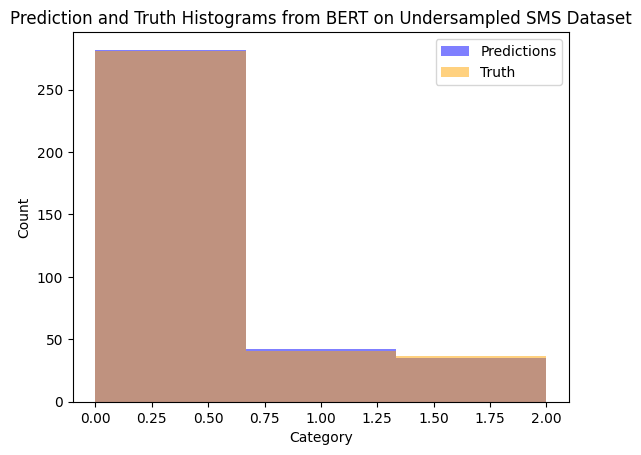

In [73]:
# Check the distribution of the predictions as well
# Overlay the histograms

plt.hist(preds_labels, bins=3, color='blue', alpha=0.5, label='Predictions')
plt.hist(true_labels, bins=3, color='orange', alpha=0.5, label='Truth')
plt.legend()
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Prediction and Truth Histograms from BERT on Undersampled SMS Dataset')
plt.show();

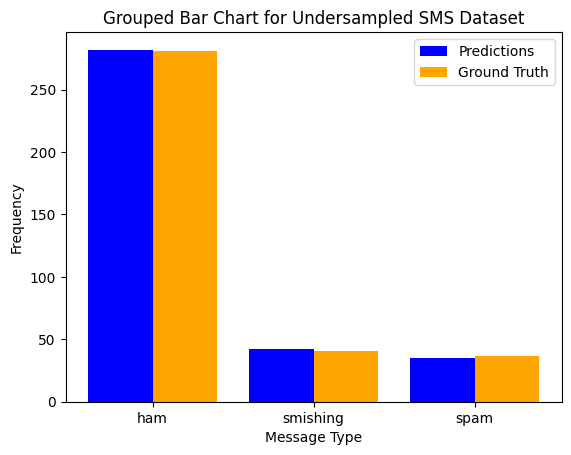

In [105]:
# Map of numerical labels to categories
label_map = {0: 'ham', 1: 'smishing', 2: 'spam'}

# Convert numerical labels to categorical labels
pred_categories = [label_map[x] for x in preds_labels]
truth_categories = [label_map[x] for x in true_labels]

bar_width = 0.4

# Count the occurrences of each category
unique, counts = np.unique(pred_categories, return_counts=True)
category_counts = dict(zip(unique, counts))

# Categories and values
categories = list(category_counts.keys())  # ['ham', 'smishing', 'spam']
pred_values = list(category_counts.values())  # [10, 15, 5]
# X positions for the bars
x = np.arange(len(categories))
plt.bar(x - bar_width / 2, pred_values, bar_width, label='Predictions', color='blue')

# Count the occurrences of each category
unique, counts = np.unique(truth_categories, return_counts=True)
category_counts = dict(zip(unique, counts))

# Categories and values
categories = list(category_counts.keys())  # ['ham', 'smishing', 'spam']
truth_values = list(category_counts.values())  # [8, 12, 7]
# Create grouped bar chart
plt.bar(x + bar_width / 2, truth_values, bar_width, label='Ground Truth', color='orange')

# Add labels and title
plt.xlabel('Message Type')
plt.ylabel('Frequency')
plt.title('Grouped Bar Chart for Undersampled SMS Dataset')
plt.xticks(x, categories)  # Replace numerical ticks with category names
plt.legend()

In [74]:
# ROC CURVE


### LLM Calls

In [75]:
## Your code begins here

#### Model Evaluation 

* Examine your models (coefficients, parameters, errors, etc...)

* Compute and interpret your results in terms of accuracy, precision, recall, ROC etc. 

In [76]:
## Your code begins here


### Issues / Improvements
1. Dataset is very small
2. Use regularization / initialization
3. Use cross-validaiton
4. ...

###  References
   - Academic (if any)
   - Online (if any)
	

### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. Keep in mind that all documents in your projects and code will be check against the official plagiarism detection tool used by Penn State ([Turnitin](https://turnitin.psu.edu))

> *This code is based on .... (if any)*

In [77]:
# End of Project